In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import setup
import astropy.io.fits as fits
import csv
import pandas as pd
import setup
from astropy.table import Table

## Reducing the 100d file

In [30]:
datadir = setup.data_home_dir()
spt_all = datadir + 'sptpol100d_catalog_huang19.fits'
dat = Table.read(spt_all, format='fits')
spt_data = dat.to_pandas()

In [31]:
type(spt_data.loc[0,'SPT_ID']) is bytes

True

In [32]:
#Use decode("utf-8") to remove the b' from the beginning of the string. 
if type(spt_data.loc[0,'SPT_ID']) is bytes:
    for i in range(len(spt_data)):
        spt_data.loc[i,'SPT_ID'] = spt_data.loc[i,'SPT_ID'].decode("utf-8")
spt_data['SPT_ID']

0     SPT-CLJ0000-5748
1     SPT-CLJ0000-6020
2     SPT-CLJ0001-5440
3     SPT-CLJ0001-5614
4     SPT-CLJ0002-5017
            ...       
84    SPT-CLJ2355-6002
85    SPT-CLJ2357-5421
86    SPT-CLJ2357-5953
87    SPT-CLJ2358-5229
88    SPT-CLJ2359-5010
Name: SPT_ID, Length: 89, dtype: object

In [34]:
spt_data

,SPT_ID,RA,Dec,xi,theta_core,redshift,redshift_unc,M500,M500_lerr,M500_uerr,imaging,P_blank,field
0,SPT-CLJ0000-5748,0.247868,-57.808061,14.644361,0.25,0.701900,0.000000,4.721501,-0.589862,0.503771,3,0.0018,b'SPTPOL_100d'
1,SPT-CLJ0000-6020,0.032286,-60.340474,7.183841,0.50,0.761757,0.048809,2.900750,-0.455428,0.385271,1,-1.0000,b'SPTPOL_100d'
2,SPT-CLJ0001-5440,0.413165,-54.669517,9.110645,0.50,0.820000,0.081900,3.368699,-0.478318,0.397177,3,0.0089,b'SPTPOL_100d'
3,SPT-CLJ0001-5614,0.486184,-56.240999,5.414786,0.25,0.428054,0.036073,2.554641,-0.455476,0.445880,3,-1.0000,b'SPTPOL_100d'
4,SPT-CLJ0002-5017,0.651454,-50.288932,5.447203,0.25,0.901207,0.033271,2.250910,-0.408256,0.402219,1,-1.0000,b'SPTPOL_100d'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,SPT-CLJ2355-6002,358.794200,-60.042788,4.778688,0.25,1.220000,0.095156,1.852832,-0.401923,0.324057,3,0.0489,b'SPTPOL_100d'
85,SPT-CLJ2357-5421,359.269100,-54.359372,7.060052,0.25,0.920000,0.081387,2.748312,-0.429318,0.371545,3,0.0145,b'SPTPOL_100d'
86,SPT-CLJ2357-5953,359.286480,-59.898796,4.665172,0.75,-1.000000,0.000000,-1.000000,-0.000000,0.000000,3,0.7677,b'SPTPOL_100d'
87,SPT-CLJ2358-5229,359.531810,-52.483996,7.687612,0.50,0.637700,0.042450,3.145803,-0.467540,0.409400,3,-1.0000,b'SPTPOL_100d'


In [35]:
#Save the new file. 

new_t = Table.from_pandas(spt_data)
#new_t.write('spt_new.fits', overwrite=True)



In [36]:
new_t

SPT_ID,RA,Dec,xi,theta_core,redshift,redshift_unc,M500,M500_lerr,M500_uerr,imaging,P_blank,field
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,bytes11
SPT-CLJ0000-5748,0.24786825,-57.808061,14.644361,0.25,0.7019,0.0,4.7215013545,-0.589861643106,0.503770643412,3,0.00179999996908,SPTPOL_100d
SPT-CLJ0000-6020,0.032285859,-60.340474,7.1838412,0.5,0.761757,0.0488087,2.90074960359,-0.45542784312,0.385270506531,1,-1.0,SPTPOL_100d
SPT-CLJ0001-5440,0.41316548,-54.669517,9.1106453,0.5,0.82,0.0819,3.36869876236,-0.478318204557,0.397177295496,3,0.00889999978244,SPTPOL_100d
SPT-CLJ0001-5614,0.48618379,-56.240999,5.4147859,0.25,0.428054,0.0360731,2.5546410948,-0.455476394444,0.445880431431,3,-1.0,SPTPOL_100d
SPT-CLJ0002-5017,0.6514538,-50.288932,5.4472032,0.25,0.901207,0.0332711,2.25090993764,-0.408255703385,0.4022194767,1,-1.0,SPTPOL_100d
SPT-CLJ0002-5214,0.59853936,-52.238762,5.8829112,0.25,-1.0,0.0,-1.0,-0.0,0.0,3,0.445300012827,SPTPOL_100d
SPT-CLJ0002-5557,0.50476238,-55.96235,7.2178521,0.75,1.15,0.09675,2.62415017849,-0.411177071237,0.355996074251,3,0.0164999999106,SPTPOL_100d
SPT-CLJ2259-5301,344.82845,-53.030793,5.0798531,0.25,1.16,0.0938409,1.9831353022,-0.407508837034,0.344884667653,3,0.0137000000104,SPTPOL_100d
SPT-CLJ2259-5349,344.79407,-53.823576,7.1744652,0.25,0.25754,0.0225766,3.2824699157,-0.515475850258,0.437595715553,3,-1.0,SPTPOL_100d


## Reducing the 500pol-deg^2 data

In [58]:
from scipy.io import readsav

datadir = setup.data_home_dir()
file = datadir + 'SPTpol_500d_sept17_master_cleaned.sav'
sav_data = readsav(file)
sav_data = sav_data['output']
sav_data.dtype.names
sav_data.dtype.fields

mappingproxy({'CAND_NAME': (dtype('O'), 0, 'cand_name'),
              'cand_name': (dtype('O'), 0, 'cand_name'),
              'SPT_FIELD_NAME': (dtype('O'), 8, 'spt_field_name'),
              'spt_field_name': (dtype('O'), 8, 'spt_field_name'),
              'MAP_USED': (dtype('O'), 16, 'map_used'),
              'map_used': (dtype('O'), 16, 'map_used'),
              'REDUCTION_METHOD': (dtype('O'), 24, 'reduction_method'),
              'reduction_method': (dtype('O'), 24, 'reduction_method'),
              'REDUCTION_VERSION': (dtype('O'), 32, 'reduction_version'),
              'reduction_version': (dtype('O'), 32, 'reduction_version'),
              'PARAMETER_SETTINGS': (dtype('O'), 40, 'parameter_settings'),
              'parameter_settings': (dtype('O'), 40, 'parameter_settings'),
              'RUN_DATE': (dtype('>f8'), 48, 'run_date'),
              'run_date': (dtype('>f8'), 48, 'run_date'),
              'SPT_RA': (dtype('>f8'), 56, 'spt_ra'),
              'spt_ra': (d

In [67]:
#Use decode("utf-8") to remove the b' from the beginning of the string. 
for i in range(len(sav_data)):
    sav_data.CAND_NAME[i] = sav_data.CAND_NAME[i].decode("utf-8")

['SPT-CLJ2332-5358' 'SPT-CLJ2232-5959' 'SPT-CLJ0058-6145'
 'SPT-CLJ0142-5032' 'SPT-CLJ0106-5943' 'SPT-CLJ2254-6314'
 'SPT-CLJ0048-5244' 'SPT-CLJ0000-5748' 'SPT-CLJ0014-4952'
 'SPT-CLJ2341-5724']


In [89]:
#Create a list of columns for the FITS file. 
from astropy.io import fits

col_type = (('SPT-ID', '16A', sav_data.CAND_NAME), ('RA','D', sav_data.SPT_RA), ('DEC','D', sav_data.SPT_DEC), ('Xi','D', sav_data.SPT_CONFIDENCE))

col_list = []
for i in range(len(col_type)):
    cur_col = fits.Column(name=col_type[i][0], format=col_type[i][1], array=col_type[i][2])
    col_list.append(cur_col)



In [90]:
tbhdu = fits.BinTableHDU.from_columns(col_list)

In [92]:
#Write to fits file.
tbhdu.writeto('SPTpol-500d.fits')

In [8]:
datadir = setup.data_home_dir()

#SPT
sptpol100d_file = datadir + 'sptpol100d_catalog_huang19.csv'


#DES--redMaPPer full run vl50
redM_full = datadir + 'y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.csv'
#DES--redMaPPer cosmology run vl02
redM_cosmo = datadir + 'y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_catalog.csv'

#Tile positions. 
des_pos = datadir + 'spt_redM_fullrun_matched_destile.csv'

#Matched catalog with members
spt_redM_fullrun_matched = datadir + 'sptpol100d_redM_lgt5vl50_mem.csv'

In [74]:
spt_redM = pd.read_csv(spt_redM_fullrun_matched)
des_pos = pd.read_csv(des_pos)

In [75]:
##Viewing list/number as string. len>2 bandaid solution. HORRIBLE. TOFIX.
matched_idx = [spt_redM['MEM_MATCH_ID'][i] != -1 for i in range(len(spt_redM))]
nomatch_idx = [spt_redM['MEM_MATCH_ID'][i] == -1 for i in range(len(spt_redM))]

#print(len(matched_idx))
#print(len(nomatch_idx))
#print(matched_idx)

## Match with redM galaxies

* Central candidates and locations
* Member candidates and locations. 

In [76]:
#":".join([RA,DEC,COLOR,SIDES])

#For each unique SPT/RedM cluster build a dataframe containing the SPT central location and the central location
#Find the member locations. 
#Remove the central candidate from the list of member location through match by ID. 
#Output into format needed by the secondary marker. 

spt_redM.dtypes

SPT_ID            object
MEM_MATCH_ID       int64
RA_SPT           float64
DEC_SPT          float64
xi               float64
redshift         float64
M500             float64
redM_richness    float64
Z_redM           float64
MASKFRAC_redM    float64
RA_RedM          float64
DEC_RedM         float64
RA_CENT           object
DEC_CENT          object
ID_CENT           object
Z_mem            float64
RA               float64
DEC              float64
ID                 int64
dtype: object

In [103]:
image_df = pd.DataFrame(None)
image_input = {}
unique_ID = np.unique(spt_redM['SPT_ID'].values)
color='yellow'
nsides=20

for i, cur_ID in enumerate(unique_ID):
    cur_cl = spt_redM.loc[spt_redM['SPT_ID'] == cur_ID]
    image_input['SPT_ID']  = cur_ID
    image_input['MEM_MATCH_ID']  = int(cur_cl['MEM_MATCH_ID'].values[0])
    image_input['RA_SPT']  = cur_cl['RA_SPT'].values[0]
    image_input['DEC_SPT']  = cur_cl['DEC_SPT'].values[0]
    
    #print(cur_ID, cur_cl['MEM_MATCH_ID'].values[0], cur_cl['RA_SPT'].values[0])
    
    #Find central candidate
    #Need to convert string to tuple. 
    #RA_cent = cur_cl['RA_CENT'][0]
    #DEC_cent = cur_cl['DEC_CENT'].values[0][0]
    #ID_cent = cur_cl['ID_CENT'].values[0][0]
    
    RA_mem = cur_cl['RA'].values
    DEC_mem = cur_cl['DEC'].values
    secondary_marker = ["%s:%s:%s:%s"%(RA_mem[j], DEC_mem[j], color, nsides) for j in range(len(cur_cl))]
    secondary_marker = ','.join(secondary_marker)
    
    image_input['Secondary_markers'] = secondary_marker
    image_df = image_df.append(image_input, ignore_index=True)

    if i%10 == 0: print(i)

0
10
20
30
40
50


In [105]:
image_df

,DEC_SPT,MEM_MATCH_ID,RA_SPT,SPT_ID,Secondary_markers
0,-57.808061,2357.0,0.247868,SPT-CLJ0000-5748,0.26596835917567896:-57.802666809151795:yellow...
1,-60.340474,12836.0,0.032286,SPT-CLJ0000-6020,0.0376236797146134:-60.3629428149343:yellow:20...
2,-54.669517,4836.0,0.413165,SPT-CLJ0001-5440,0.335711588949295:-54.658223304488004:yellow:2...
3,-56.240999,4491.0,0.486184,SPT-CLJ0001-5614,"0.484119562070062:-56.180546129914:yellow:20,0..."
4,-53.823576,2834.0,344.794070,SPT-CLJ2259-5349,"344.698970393072:-53.8727742378222:yellow:20,3..."
5,-54.526029,15577.0,344.978340,SPT-CLJ2259-5431,"344.976856635728:-54.5260040553308:yellow:20,3..."
6,-53.520842,1027.0,345.174860,SPT-CLJ2300-5331,345.072851293292:-53.551842143085395:yellow:20...
7,-56.284869,274.0,345.000290,SPT-CLJ2300-5617,"344.77871864323:-56.20348677325379:yellow:20,3..."
8,-53.284278,1982.0,345.337060,SPT-CLJ2301-5317,345.219088345628:-53.272817150278996:yellow:20...
9,-55.775904,19868.0,345.448650,SPT-CLJ2301-5546,"345.44117952207296:-55.748659452114:yellow:20,..."


['SPT-CLJ0000-5748' 'SPT-CLJ0000-6020' 'SPT-CLJ0001-5440'
 'SPT-CLJ0001-5614' 'SPT-CLJ2259-5349' 'SPT-CLJ2259-5431'
 'SPT-CLJ2300-5331' 'SPT-CLJ2300-5617' 'SPT-CLJ2301-5317'
 'SPT-CLJ2301-5546' 'SPT-CLJ2303-5114' 'SPT-CLJ2304-5007'
 'SPT-CLJ2304-5718' 'SPT-CLJ2305-5719' 'SPT-CLJ2306-5120'
 'SPT-CLJ2307-5440' 'SPT-CLJ2309-5710' 'SPT-CLJ2311-4944'
 'SPT-CLJ2311-5522' 'SPT-CLJ2311-5820' 'SPT-CLJ2314-5554'
 'SPT-CLJ2316-5454' 'SPT-CLJ2317-5357' 'SPT-CLJ2317-5852'
 'SPT-CLJ2318-5059' 'SPT-CLJ2318-5617' 'SPT-CLJ2319-5842'
 'SPT-CLJ2320-5233' 'SPT-CLJ2323-5752' 'SPT-CLJ2325-5116'
 'SPT-CLJ2325-5316' 'SPT-CLJ2325-5815' 'SPT-CLJ2327-5137'
 'SPT-CLJ2328-5533' 'SPT-CLJ2329-5831' 'SPT-CLJ2331-5052'
 'SPT-CLJ2332-5220' 'SPT-CLJ2332-5358' 'SPT-CLJ2334-5308'
 'SPT-CLJ2334-5938' 'SPT-CLJ2336-5352' 'SPT-CLJ2337-5912'
 'SPT-CLJ2337-5942' 'SPT-CLJ2339-5550' 'SPT-CLJ2343-5024'
 'SPT-CLJ2344-5655' 'SPT-CLJ2349-5113' 'SPT-CLJ2350-5301'
 'SPT-CLJ2351-5005' 'SPT-CLJ2351-5452' 'SPT-CLJ2352-5251'
 'SPT-CLJ2354-

<function matplotlib.pyplot.show(close=None, block=None)>

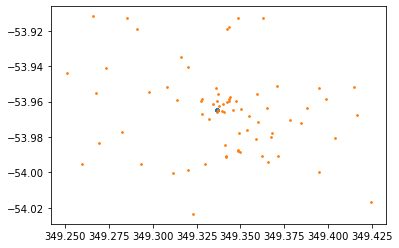

In [112]:
unique_ID = np.unique(spt_redM['SPT_ID'].values)
print(unique_ID)
    
    
cur_ID = 'SPT-CLJ2317-5357'
cur_cl = spt_redM.loc[spt_redM['SPT_ID'] == cur_ID]
RA_mem = cur_cl['RA'].values
DEC_mem = cur_cl['DEC'].values
    
plt.scatter(cur_cl['RA_SPT'], cur_cl['DEC_SPT'], s=10)
plt.scatter(RA_mem, DEC_mem, s=3)
plt.show
